#Лабораторная работа №5

In [3]:
import numpy as np
from random import random
import math
import os
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
from random import uniform as uniform
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score, accuracy_score

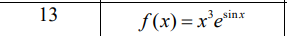

image.png

In [ ]:
#Функция апроксимации значений
def approximations_fun(x):
  return x ** 3 * math.pow(math.e, math.sin(x))

In [ ]:
x = np.linspace(-math.pi, math.pi, 50)

x_res = []
for i in range(len(x)):
  xx = []
  xx.append(x[i])
  xx.append(1)
  x_res.append(xx)

x_res = np.asarray(x_res)
y = [approximations_fun(x[i]) for i in range(len(x))]

#Back Propogation

In [95]:
network_layer_1 = 2
neuron_count_1 = [5, 1]

network_layer_2 = 3
neuron_count_2 = [5, 5, 1]

#Сигмовидная функция активации
def activate(x):
  return 1 / (1 + math.pow(math.e, -x))

  #Производная от сигмоидной фукции
def dy_activate(x):
  return activate(x) * (1 - activate(x))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y, test_size = 0.20, random_state=10)

In [682]:
#Функция генерирования рандомных весов
def generate_weight(size_of_first_layer, neuron_count, network_layer):
  weights = []
  for i in range(network_layer):
    weight_layer = []
    for j in range(neuron_count[i]):
      weight_neuron = []

      if(i == 0):
        for m in range(size_of_first_layer):
          weight_neuron.append(uniform(-0.5, 0.5))
      else:
        for m in range(neuron_count[i - 1] + 1):
          weight_neuron.append(uniform(-0.5, 0.5))
      weight_layer.append(weight_neuron)
    weights.append(weight_layer)
  return weights

In [12]:
#Функция копирования значений весов
def weights_copy(weights):
  weights_copy = []
  for i in range(len(weights)):
    weights_layer = []
    for j in range(len(weights[i])):
      weights_neuron = []
      for m in range(len(weights[i][j])):
        weights_neuron.append(weights[i][j][m])
      weights_layer.append(weights_neuron)
    weights_copy.append(weights_layer)
  return weights_copy

In [13]:
#Функция вывода весов
def printWeight(weights, network_layer, neuron_count):
  for i in range(network_layer):
    print("Layer --------------------- {0}".format(i + 1))
    for j in range(neuron_count[i]):
      print("Neuron - {0}".format(j + 1))
      print(weights[i][j])

In [ ]:
weights_1 = generate_weight(len(x_res[0]), neuron_count_1, network_layer_1)
print(printWeight(weights_1, network_layer_1, neuron_count_1))

weights_2 = generate_weight(len(x_res[0]), neuron_count_2, network_layer_2)


Layer --------------------- 1
Neuron - 1
[0.49648619500265145, 0.06103749352748622]
Neuron - 2
[0.26960443379633137, 0.44504525697439634]
Neuron - 3
[0.4401805005184115, 0.4494915192784382]
Neuron - 4
[0.41490494596701555, 0.20828884048633434]
Neuron - 5
[-0.01959776746141917, 0.08383134702380746]
Layer --------------------- 2
Neuron - 1
[-0.49857691931645076, 0.2369196242819046, 0.08013029159822482, 0.19785976504680192, 0.1057233617379193, 0.22732396462339322]
None


In [553]:
def predict(weights, x_train, bias):
  output_value_by_every_layer = []
  input_value_by_every_layer = []
  for i in range(len(weights)):
    input_value_of_layer = []
    output_value_of_layer = []

    for j in range(len(weights[i])):
      output_value_neuron = 0

      if(i == 0):
        input_value_neuron = np.dot(weights[i][j], x_train)
      else:
        input_value_neuron = np.dot(weights[i][j], output_value_by_every_layer[i - 1])
      
      output_value_neuron = activate(input_value_neuron)
      output_value_of_layer.append(output_value_neuron)
      input_value_of_layer.append(input_value_neuron)

    if(i != len(weights) - 1):
      output_value_of_layer.append(bias)
    else:
      output_value_of_layer = input_value_of_layer

    input_value_by_every_layer.append(input_value_of_layer)
    output_value_by_every_layer.append(output_value_of_layer)

    '''print("Layer {0}".format(i + 1))
    print("Input value")
    print(input_value_of_layer)
    print("Output value")
    print(output_value_of_layer)'''

  return input_value_by_every_layer, output_value_by_every_layer

In [ ]:
intput, output = predict(weights_1,x_train[6] ,1)

In [690]:
#Функция расчета значений потери между y-предсказанным и y-тестовым
def err_loss(x_test, y_test, weights, bias):
  loss = 0
  last = len(weights) - 1
  for i in range(len(x_test)):
    y_inp, y_out = predict(weights, x_test[i], bias)
    loss += np.square(y_out[last][0] - y_test[i])

  loss = np.sqrt(loss) / len(x_test)
  return loss

  #Функция расчета hitrate
def err_acc(x_test, y_test, weights, eps, bias):
  hit = 0
  last = len(weights) - 1
  for i in range(len(x_test)):
    y_inp, y_out = predict(weights, x_test[i], bias)
    if(np.abs(y_out[last][0] - y_test[i]) < eps): hit = hit + 1
  return hit / len(x_test)

In [683]:
def back_Propogation(weights, epoch, a, x_train, y_train, x_test, y_test, bias):
  sigma_list = []
  for i in range(len(weights)):
    any_list = []
    for j in range(len(weights[i])):
      any_list.append(0)
    sigma_list.append(any_list)

  last_index = len(weights) - 1
  error = 0
  for i in range(epoch):

    print("Эпоха №{0}".format(i+ 1))
    print("Loss: {0}".format(err_loss(x_test, y_test, weights, bias)))
    for j in range(len(x_train)):
      input_value, output_value = predict(weights, x_train[j], bias)

      #Выходной нейрон
      error = y_train[j] - output_value[last_index][0]
      g = dy_activate(input_value[last_index][0]) * error
      sigma_list[last_index][0] = g

      for p in range(len(weights[last_index][0])):
        weights[last_index][0][p] += a * g * output_value[last_index - 1][p]
      
      #Скрытый слой
      for p in range(last_index - 1, -1, -1):
        for m in range(len(weights[p])):
          sigma = 0
          for k in range(len(weights[p + 1])):
            sigma += weights[p + 1][k][m] * sigma_list[p + 1][k]
          
          g = sigma * dy_activate(input_value[p][m])
          sigma_list[p][m] = g

          if(p == 0):
            for k in range(len(weights[p][m])):
              weights[p][m][k] += g * a * x_train[j][k]
          else:
            for k in range(len(weights[p][m])):
              weights[p][m][k] += g * a * output_value[p - 1][k]

  return weights

In [ ]:
weights_bp_1 = back_Propogation(weights_1, 3000, 1, x_train, y_train, x_test, y_test, 1)


Выходные данные были обрезаны до нескольких последних строк (5000).
Эпоха №501
Loss: 2.8866138780261776
Эпоха №502
Loss: 2.8862469693150654
Эпоха №503
Loss: 2.8858809113107626
Эпоха №504
Loss: 2.8855156999782876
Эпоха №505
Loss: 2.8851513313094803
Эпоха №506
Loss: 2.884787801322781
Эпоха №507
Loss: 2.8844251060629946
Эпоха №508
Loss: 2.884063241601067
Эпоха №509
Loss: 2.8837022040338693
Эпоха №510
Loss: 2.8833419894839785
Эпоха №511
Loss: 2.882982594099444
Эпоха №512
Loss: 2.882624014053599
Эпоха №513
Loss: 2.882266245544826
Эпоха №514
Loss: 2.881909284796356
Эпоха №515
Loss: 2.8815531280560562
Эпоха №516
Loss: 2.881197771596234
Эпоха №517
Loss: 2.8808432117134175
Эпоха №518
Loss: 2.8804894447281613
Эпоха №519
Loss: 2.8801364669848497
Эпоха №520
Loss: 2.8797842748514997
Эпоха №521
Loss: 2.8794328647195506
Эпоха №522
Loss: 2.8790822330036914
Эпоха №523
Loss: 2.8787323761416554
Эпоха №524
Loss: 2.8783832905940328
Эпоха №525
Loss: 2.8780349728440853
Эпоха №526
Loss: 2.8776874193975592
Эпо

In [ ]:
weights_bp_2 = back_Propogation(weights_2, 3000, 1, x_train, y_train, x_test, y_test, 1)

Выходные данные были обрезаны до нескольких последних строк (5000).
Эпоха №501
Loss: 5.281663599624872
Эпоха №502
Loss: 5.28141214290389
Эпоха №503
Loss: 5.281160331840371
Эпоха №504
Loss: 5.280908165388377
Эпоха №505
Loss: 5.280655642497251
Эпоха №506
Loss: 5.280402762111563
Эпоха №507
Loss: 5.2801495231711275
Эпоха №508
Loss: 5.279895924610961
Эпоха №509
Loss: 5.279641965361211
Эпоха №510
Loss: 5.279387644347181
Эпоха №511
Loss: 5.279132960489258
Эпоха №512
Loss: 5.278877912702933
Эпоха №513
Loss: 5.278622499898708
Эпоха №514
Loss: 5.278366720982107
Эпоха №515
Loss: 5.278110574853625
Эпоха №516
Loss: 5.277854060408743
Эпоха №517
Loss: 5.277597176537826
Эпоха №518
Loss: 5.277339922126138
Эпоха №519
Loss: 5.277082296053797
Эпоха №520
Loss: 5.276824297195734
Эпоха №521
Loss: 5.27656592442169
Эпоха №522
Loss: 5.276307176596149
Эпоха №523
Loss: 5.276048052578336
Эпоха №524
Loss: 5.275788551222158
Эпоха №525
Loss: 5.275528671376188
Эпоха №526
Loss: 5.275268411883618
Эпоха №527
Loss: 5.2750

In [ ]:
predict1 = []
for i in range(len(x_res)):
  intput, output = predict(weights_bp_1,x_res[i] ,1)
  predict1.append(output[-1][0])

predict2 = []
for i in range(len(x_res)):
  intput, output = predict(weights_bp_2,x_res[i] ,1)
  predict2.append(output[-1][0])

#RBF

In [ ]:
#Функция для вычисления нашей одномерной функции активации, которую будем использовать при выислении параметров матрицы (Эта функция похожа на функицю активации, только в более простом виде, если активация - имееет общий вид)
def fun_h(x , a , c):
  return np.exp(-a * np.abs(x - c))

#Матрица h, которая вычисляет все наши веса, использую нашу функцию (значения функции активации на каждом нейроне)
#t_c - количество нейронов скрытого слоя
#t_x - количесво примеров в обучающей выборке
def fun_H(t_x, t_c, a):
  H = np.zeros((len(t_x), len(t_c)))
  for i in range(len(t_x)):
    for j in range(len(t_c)):
      H[i][j] = fun_h(t_x[i], a, t_c[j])
  return H

#Функция для вычисления нейронной сети
def fun_RBF(x, t_c, a, w):
  h = np.zeros(len(t_c))
  for i in range(len(t_c)):
    h[i] = fun_h(x, a, t_c[i])
  return np.dot(h, w)

In [ ]:
#Выбор центров на основе анализа первичных данных (кластерный анализ)
test_c = np.linspace(-math.pi, math.pi, 5)
#test_c = np.array([-2 , -1, 0, 1, 2])

r = 1.5
a = 1 / (2 * r * r)

In [ ]:
#Обучение нейронки
H = fun_H(x , test_c , a)

#Количетсво столбцов - количество нейронов на скрытом слое 
#Количество строк - кол.входных значений

In [ ]:
H_ = np.dot(np.linalg.inv(np.dot(H.transpose(), H)), H.transpose())
W = np.dot(H_, y)
print(W)
#X = np.linspace(-2, 2, 100)
pred_y = np.zeros((len(x)))
for i in range(len(x)):
  pred_y[i] = fun_RBF(x[i], test_c, a, W)

[-48.31633222  41.35715579 -24.49083599 -17.06542239  58.13060978]


#Сравнение

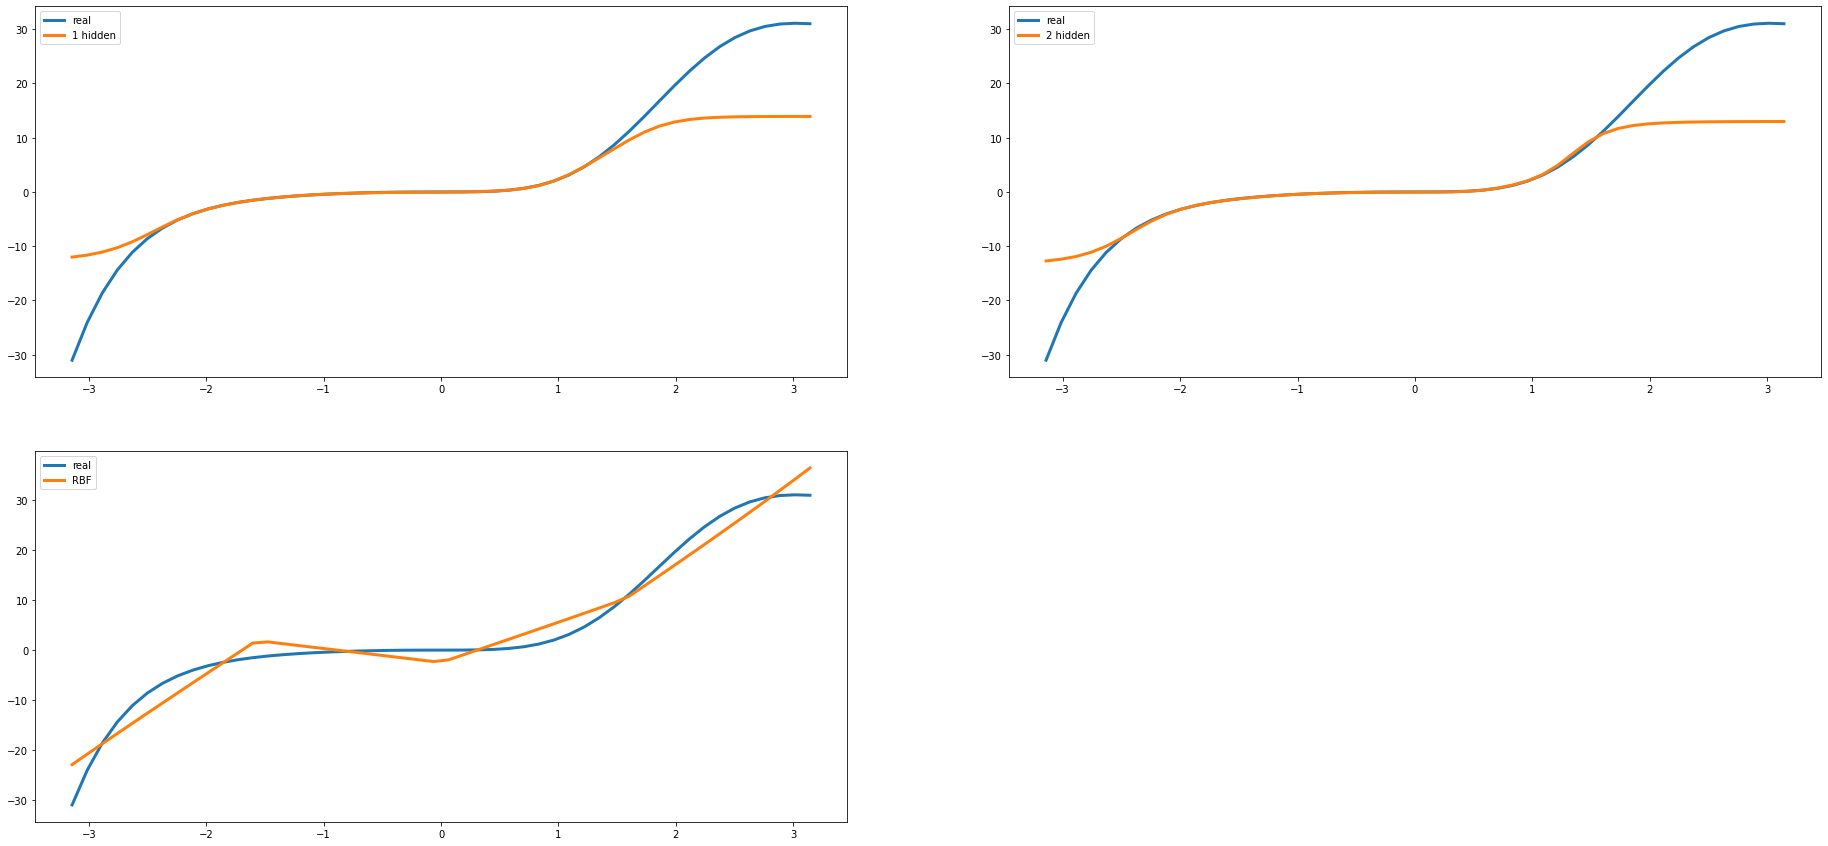

In [ ]:
plt.figure(figsize = (32, 15))
plt.subplot(2, 2, 1)
plt.plot(x, y, linewidth = 3, label = 'real')
plt.plot(x, predict1, linewidth = 3, label = '1 hidden')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, y, linewidth = 3, label = 'real')
plt.plot(x, predict2, linewidth = 3, label = '2 hidden')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, y, linewidth = 3, label = 'real')
plt.plot(x, pred_y, linewidth = 3, label = 'RBF')
plt.legend()

#2 часть

In [684]:
from sklearn import preprocessing

#money = ([2.4734, 2.4734, 2.4865, 2.4791, 2.4780, 2.4780, 2.4780, 2.4780, 2.4709, 2.4718, 2.4851, 2.4778, 2.4778, 2.4708, 2.4705, 2.4582, 2.4528, 2.4501, 2.4501, 2.4501, 2.4469, 2.4471, 2.4471, 2.4447, 2.4364, 2.4364, 2.4364, 2.4540, 2.4695, 2.4683])
#money = preprocessing.normalize([money])
#money = money[0]

#money_for_test = [2.4725, 2.4705, 2.4705, 2.4705, 2.4703, 2.4639, 2.4599, 2.4601, 2.4549, 2.4549, 2.4549, 2.4420, 2.4341, 2.4328, 2.4436, 2.4332, 2.4432, 2.4432, 2.4390, 2.4377, 2.4349, 2.4287, 2.4287, 2.4287, 2.4287, 2.4260, 2.4281, 2.4339]
#money_for_test = preprocessing.normalize([money_for_test])
#money_for_test = money_for_test[0]

t = [0, 2, 0, -1, -4, -4, -8, -10, -9, -7, -13, -8, -1, -3, -3, -2, 0, 3, -1, -3, -2, -4, -7, -9, -9, -9, -10, -9, 1, 1, 0]
t_test = [4, 1, 1, 3, -1, -1, 1, 0, -1, -2, -2, -1, -2, -7, -12, -17, -16, -15, -15, -11, 0, 13, 5, 5, 1, 0, -1, -3, -3, -2] 



Text(0, 0.5, 't')

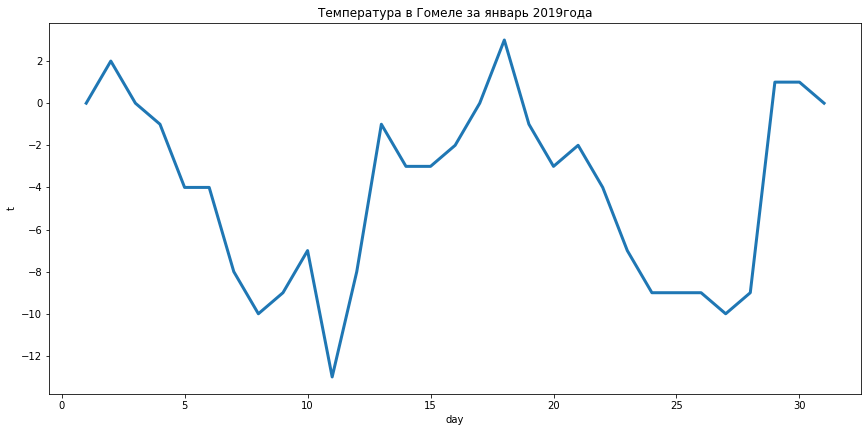

In [685]:
plt.figure(figsize = (32, 15))
plt.subplot(2, 2, 1)
plt.plot(range(1 , len(t) + 1, 1), t, linewidth = 3)
plt.title('Температура в Гомеле за январь 2019года')
plt.xlabel('day')
plt.ylabel('t')

In [691]:
#Функция скользящего окна для получения x и y по логике: каждое значение y получается с учетом стольких значений, сколько задано в iteration_size
def get_x_and_y(money, iteration_size):
  x = []
  y = []
  for i in range(len(money) - iteration_size):
    x_buffer = []
    for j in range(iteration_size):
      x_buffer.append(money[i + j])
    x.append(x_buffer)
    y.append(money[i + iteration_size])
  return x, y

In [692]:
x, y = get_x_and_y(t, 5)
x1, y1 = get_x_and_y(t_test, 5)
#вставка bias
for i in range(len(x)):
  x[i].append(1)
for i in range(len(x1)):
  x1[i].append(1)

In [693]:
#Деление данных
x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size = 0.20, random_state=10)

In [286]:
'''print("Январь:")
print(x)
print(y)
print("Февраль:")
print(x1)
print(y1)'''

'print("Январь:")\nprint(x)\nprint(y)\nprint("Февраль:")\nprint(x1)\nprint(y1)'

In [694]:
neuron_count_3 = [16, 8, 4, 1]
network_layer_3 = 4
weights_3 = generate_weight(len(x_trn[0]), neuron_count_3, network_layer_3)

weights_bp_3 = back_Propogation(weights_3, 1000, 0.1, x_trn, y_trn, x_tst, y_tst, 1)

predict_y_test = []
for i in range(len(x1)):
  intput, output = predict(weights_bp_3, x1[i], 1)
  predict_y_test.append(output[-1][0])
print("y true: ")
print(y1)
print("y_predict: ")
print(predict_y_test)

Эпоха №1
Loss: 3.596345048600616
Эпоха №2
Loss: 2.6897070230347375
Эпоха №3
Loss: 2.491741903326623
Эпоха №4
Loss: 2.398446821384954
Эпоха №5
Loss: 2.341150846509015
Эпоха №6
Loss: 2.3015368579226663
Эпоха №7
Loss: 2.2722351218927153
Эпоха №8
Loss: 2.2495957655243486
Эпоха №9
Loss: 2.231564772403821
Эпоха №10
Loss: 2.2168808022556723
Эпоха №11
Loss: 2.204718381926679
Эпоха №12
Loss: 2.19451039611151
Эпоха №13
Loss: 2.185851998890327
Эпоха №14
Loss: 2.178445072071571
Эпоха №15
Loss: 2.1720643873064414
Эпоха №16
Loss: 2.1665360819008166
Эпоха №17
Loss: 2.1617234642587784
Эпоха №18
Loss: 2.1575173616167196
Эпоха №19
Loss: 2.153829381053706
Эпоха №20
Loss: 2.1505870951824364
Эпоха №21
Loss: 2.1477305326909177
Эпоха №22
Loss: 2.1452095738739794
Эпоха №23
Loss: 2.1429819866280804
Эпоха №24
Loss: 2.1410119239556473
Эпоха №25
Loss: 2.1392687594684254
Эпоха №26
Loss: 2.137726174095256
Эпоха №27
Loss: 2.136361431998028
Эпоха №28
Loss: 2.1351548007507115
Эпоха №29
Loss: 2.1340890827530146
Эпоха №

Text(0, 0.5, 't')

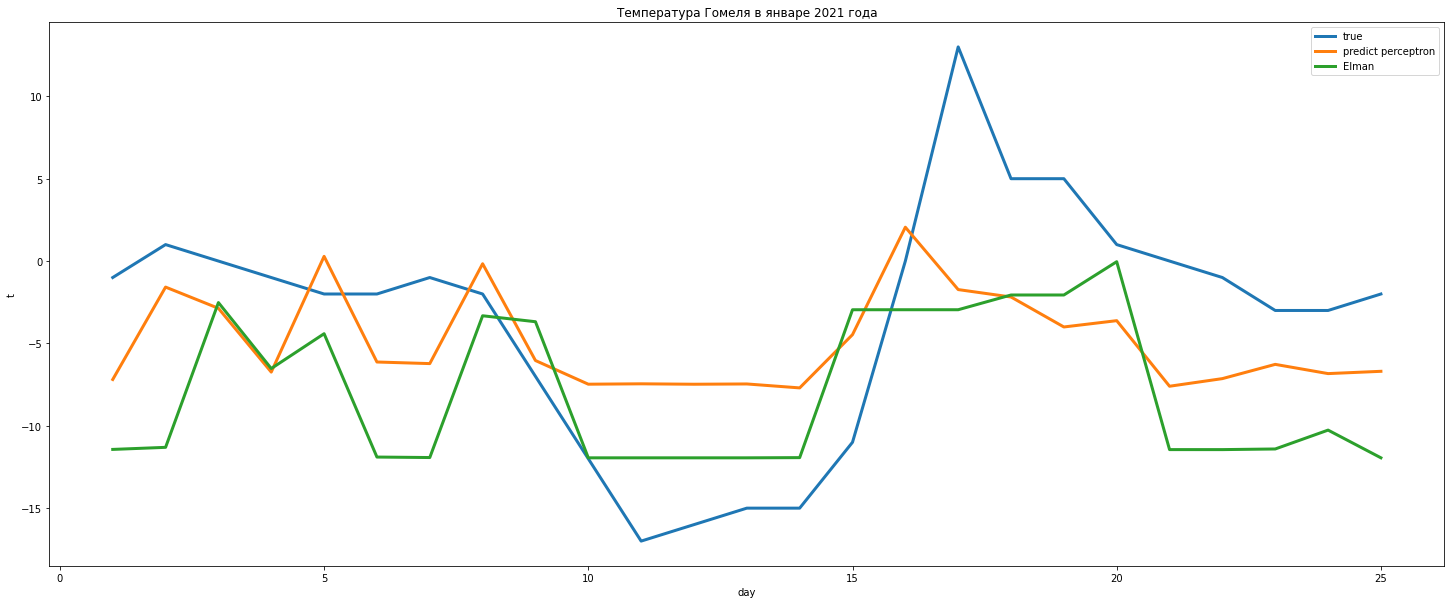

In [706]:
plt.figure(figsize = (25, 10))
plt.plot(range(1 , len(y1) + 1, 1), y1, linewidth = 3, label = 'true')
plt.plot(range(1 , len(y1) + 1, 1), predict_y_test, linewidth = 3, label = 'predict perceptron')
plt.plot(range(1, len(y1) + 1, 1), predict_Elman , linewidth = 3, label = 'Elman')
plt.legend()
plt.title('Температура Гомеля в январе 2021 года')
plt.xlabel('day')
plt.ylabel('t')

#Сеть Элмана

In [698]:
neuron_count_4 = [8, 4, 1]
network_layer_4 = 3


In [699]:
def predict2_0(weights, x_train, bias):

  C = []
  output_value_by_every_layer = []
  input_value_by_every_layer = []
  for i in range(len(weights)):
    input_value_of_layer = []
    output_value_of_layer = []

    for j in range(len(weights[i])):
      output_value_neuron = 0

      if(i == 0):
        input_value_neuron = np.dot(weights[i][j], x_train)
      else:
        input_value_neuron = np.dot(weights[i][j], output_value_by_every_layer[i - 1])
      
      output_value_neuron = activate(input_value_neuron)
      output_value_of_layer.append(output_value_neuron)
      input_value_of_layer.append(input_value_neuron)

    if(i == len(weights) - 2):
      C = output_value_of_layer

    if(i != len(weights) - 1):
      output_value_of_layer.append(bias)
    else:
      output_value_of_layer = input_value_of_layer

    input_value_by_every_layer.append(input_value_of_layer)
    output_value_by_every_layer.append(output_value_of_layer)

  return input_value_by_every_layer, output_value_by_every_layer, C

In [700]:
#Функция расчета значений потери между y-предсказанным и y-тестовым
def err_loss_Elman(x_test, y_test, weights, bias, neuron_on_last_layer):
  loss = 0
  last = len(weights) - 1
  for i in range(len(x_test)):

    y_inp, y_out, C = predict2_0(weights, x_test[i], bias)
    loss += np.square(y_out[last][0] - y_test[i])
  loss = np.sqrt(loss) / len(x_test)
  return loss

In [701]:
def append_C(x, C):
  for i in range(len(x)):
    for j in range(len(C)):
      x[i].append(C[j])
  return x

In [702]:
def Elman(epoch, x_train, y_train, x_test, y_test, neuron_on_last_layer, bias, a):  
  weights = generate_weight(len(x_train[0]) + neuron_count_4[-2], neuron_count_4, network_layer_4)

  sigma_list = []
  for i in range(len(weights)):
    any_list = []
    for j in range(len(weights[i])):
      any_list.append(0)
    sigma_list.append(any_list)
  last_index = len(weights) - 1
  error = 0
  C = np.zeros((neuron_on_last_layer))
  L = len(x_train[0])
  l = len(x_test[0])
  x_train = append_C(x_train, C)
  x_test = append_C(x_test, C)
  for i in range(epoch):
    print("Эпоха №{0}".format(i+ 1))
    
    pred_C = []
    for j in range(len(x_train)):
      input_value, output_value, pred_C = predict2_0(weights, x_train[j], bias)
      
      if(j != len(x_train) - 1):
        for p in range(len(C)):
          x_train[j + 1][L + p] = pred_C[p]
      else:
        x_train[j][-1] = pred_C[-1]

      error = y_train[j] - output_value[last_index][0]
      g = dy_activate(input_value[last_index][0]) * error
      sigma_list[last_index][0] = g

      for p in range(len(weights[last_index][0])):
        weights[last_index][0][p] += a * g * output_value[last_index - 1][p]
      
      for p in range(last_index - 1, -1, -1):
        for m in range(len(weights[p])):
          sigma = 0
          for k in range(len(weights[p + 1])):
            sigma += weights[p + 1][k][m] * sigma_list[p + 1][k]
          
          g = sigma * dy_activate(input_value[p][m])
          sigma_list[p][m] = g

          if(p == 0):
            for k in range(len(weights[p][m])):
              weights[p][m][k] += g * a * x_train[j][k]
          else:
            for k in range(len(weights[p][m])):
              weights[p][m][k] += g * a * output_value[p - 1][k]

    print("Loss: {0}".format(err_loss_Elman(x_test, y_test, weights, bias, neuron_on_last_layer)))  
  return weights


In [703]:
weights_Elman = Elman(1000, x_trn, y_trn, x_tst, y_tst, 4, 1, 1)

Эпоха №1
Loss: 1.9336707578447463
Эпоха №2
Loss: 1.9764697714917754
Эпоха №3
Loss: 1.9879724962226704
Эпоха №4
Loss: 1.9890533989048376
Эпоха №5
Loss: 1.9880338520220102
Эпоха №6
Loss: 1.982372889543485
Эпоха №7
Loss: 1.976630458816478
Эпоха №8
Loss: 1.963696332187883
Эпоха №9
Loss: 1.9123398657074742
Эпоха №10
Loss: 1.859127538877235
Эпоха №11
Loss: 1.9555646929284556
Эпоха №12
Loss: 1.6570008613376317
Эпоха №13
Loss: 1.668230717632441
Эпоха №14
Loss: 1.640574435721981
Эпоха №15
Loss: 1.7188092324073727
Эпоха №16
Loss: 1.7003832633101277
Эпоха №17
Loss: 1.6812248081748369
Эпоха №18
Loss: 1.6613235846355507
Эпоха №19
Loss: 1.6406934664770176
Эпоха №20
Loss: 1.6193902971421001
Эпоха №21
Loss: 1.5975420902544017
Эпоха №22
Loss: 1.5754011202738658
Эпоха №23
Loss: 1.553435676726459
Эпоха №24
Loss: 1.5324956733354622
Эпоха №25
Loss: 1.5141198133883256
Эпоха №26
Loss: 1.5011222052373263
Эпоха №27
Loss: 1.4987467002489663
Эпоха №28
Loss: 1.517006174284741
Эпоха №29
Loss: 1.5755695300622203
Эп

In [704]:
C = np.zeros((4))
x_train = append_C(x1, C)
predict_Elman = []
for i in range(len(x_train)):
  intput, output, C = predict2_0(weights_Elman, x_train[i], 1)
  predict_Elman.append(output[-1][0])